In [104]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf
import pandas_ta as ta
data = yf.download('^NDX', start = '2020-06-01',end = '2025-06-01')
data.head(10)

[*********************100%***********************]  1 of 1 completed

Price,Close,High,Low,Open,Volume
Ticker,^NDX,^NDX,^NDX,^NDX,^NDX
Date,,,,,
2020-06-01,9598.889648,9609.379883,9515.339844,9526.429688,3847770000
2020-06-02,9657.309570,9660.080078,9511.879883,9603.179688,3990080000
2020-06-03,9704.690430,9729.690430,9648.929688,9689.719727,4679030000
2020-06-04,9629.660156,9741.969727,9577.709961,9672.169922,6141320000
2020-06-05,9824.389648,9846.629883,9659.450195,9673.089844,6607730000
2020-06-08,9901.519531,9904.519531,9753.870117,9805.690430,6197330000
2020-06-09,9967.169922,10006.900391,9859.000000,9861.179688,5319450000
2020-06-10,10094.259766,10155.200195,10022.440430,10037.980469,5170860000


In [105]:
data.columns

MultiIndex([( 'Close', '^NDX'),
            (  'High', '^NDX'),
            (   'Low', '^NDX'),
            (  'Open', '^NDX'),
            ('Volume', '^NDX')],
           names=['Price', 'Ticker'])

In [ ]:
data.columns = [f"{col[0]}" for col in data.columns]

In [107]:
data.columns

Index(['Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')

In [ ]:
# Adding indicators
data['RSI']=ta.rsi(data.Close, length=15)
data['EMAF']=ta.ema(data.Close, length=20)
data['EMAM']=ta.ema(data.Close, length=100)
data['EMAS']=ta.ema(data.Close, length=150)

In [109]:
# Copy the 'Close' column and add it as a new column 'Adj Close'
data['Adj Close'] = data[('Close')]
data.head()

,Close,High,Low,Open,Volume,RSI,EMAF,EMAM,EMAS,Adj Close
Date,,,,,,,,,,
2020-06-01,9598.889648,9609.379883,9515.339844,9526.429688,3847770000,NaN,NaN,NaN,NaN,9598.889648
2020-06-02,9657.309570,9660.080078,9511.879883,9603.179688,3990080000,100.000000,NaN,NaN,NaN,9657.309570
2020-06-03,9704.690430,9729.690430,9648.929688,9689.719727,4679030000,100.000000,NaN,NaN,NaN,9704.690430
2020-06-04,9629.660156,9741.969727,9577.709961,9672.169922,6141320000,92.026369,NaN,NaN,NaN,9629.660156
2020-06-05,9824.389648,9846.629883,9659.450195,9673.089844,6607730000,93.468196,NaN,NaN,NaN,9824.389648


In [110]:
data.shape

(1257, 10)

In [111]:
data.columns

Index(['Close', 'High', 'Low', 'Open', 'Volume', 'RSI', 'EMAF', 'EMAM', 'EMAS',
       'Adj Close'],
      dtype='object')

In [112]:
data['Target'] = data['Adj Close']-data.Open
data['Target'] = data['Target'].shift(-1)

data['TargetClass'] = [1 if data.Target[i]>0 else 0 for i in range(len(data))]

data['TargetNextClose'] = data['Adj Close'].shift(-1)

data.dropna(inplace=True)
data.reset_index(inplace = True)
data.drop(['Volume', 'Close', 'Date'], axis=1, inplace=True)

C:\Users\PC\AppData\Local\Temp\ipykernel_10180\3882623163.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  data['TargetClass'] = [1 if data.Target[i]>0 else 0 for i in range(len(data))]


In [113]:
data.head()

,High,Low,Open,RSI,EMAF,EMAM,EMAS,Adj Close,Target,TargetClass,TargetNextClose
0,12904.089844,12804.750000,12852.959961,68.107248,12619.799172,11782.359256,11337.329980,12888.280273,-255.559570,0,12694.660156
1,12950.219727,12537.419922,12950.219727,58.263145,12626.928789,11800.424620,11355.307864,12694.660156,139.250000,1,12802.379883
2,12809.669922,12663.129883,12663.129883,61.560279,12643.638417,11820.265319,11374.474380,12802.379883,22.089844,1,12623.349609
3,12803.290039,12569.419922,12601.259766,53.997973,12641.706150,11836.167978,11391.015774,12623.349609,194.160156,1,12939.570312
4,12966.679688,12744.820312,12745.410156,62.643838,12670.074165,11858.017529,11411.526430,12939.570312,67.959961,1,13105.200195


In [114]:
data.shape

(1107, 11)

In [115]:
data_set = data.iloc[:, 0:11]#.values
pd.set_option('display.max_columns', None)

print(data_set.shape)
print(data.shape)
print(type(data_set))

(1107, 11)
(1107, 11)
<class 'pandas.core.frame.DataFrame'>


In [ ]:
data_set.head(20) # target next close, sonraki günün adj close u tahmin etmeye çalışıyor

,High,Low,Open,RSI,EMAF,EMAM,EMAS,Adj Close,Target,TargetClass,TargetNextClose
0,12904.089844,12804.750000,12852.959961,68.107248,12619.799172,11782.359256,11337.329980,12888.280273,-255.559570,0,12694.660156
1,12950.219727,12537.419922,12950.219727,58.263145,12626.928789,11800.424620,11355.307864,12694.660156,139.250000,1,12802.379883
2,12809.669922,12663.129883,12663.129883,61.560279,12643.638417,11820.265319,11374.474380,12802.379883,22.089844,1,12623.349609
3,12803.290039,12569.419922,12601.259766,53.997973,12641.706150,11836.167978,11391.015774,12623.349609,194.160156,1,12939.570312
4,12966.679688,12744.820312,12745.410156,62.643838,12670.074165,11858.017529,11411.526430,12939.570312,67.959961,1,13105.200195
5,13113.089844,12939.730469,13037.240234,66.193661,12711.514740,11882.714215,11433.959195,13105.200195,-59.009766,0,12902.490234
6,13023.209961,12883.589844,12961.500000,58.888346,12729.702882,11902.907800,11453.409938,12902.490234,-24.009766,0,12892.089844
7,12957.429688,12783.709961,12916.099609,58.534805,12745.168307,11922.495563,11472.465301,12892.089844,61.759766,1,12973.629883
8,13008.849609,12878.019531,12911.870117,60.517106,12766.926552,11943.310104,11492.348275,12973.629883,-112.250000,0,12898.690430
9,13037.049805,12886.160156,13010.940430,57.807904,12779.475493,11962.228526,11510.975324,12898.690430,-94.160156,0,12803.929688


In [117]:
#Target column Categories
#y =[1 if data.Open[i]>data.Close[i] else 0 for i in range(0, len(data))]
#yi = [data.Open[i]-data.Close[i] for i in range(0, len(data))]
#print(yi)
#print(len(yi))

In [103]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
data_set_scaled = sc.fit_transform(data_set)
print(data_set_scaled)

[[0.18116952 0.20371287 0.20277858 ... 0.23161639 0.         0.17530226]
 [0.18522302 0.18067732 0.21109534 ... 0.364433   1.         0.18467224]
 [0.17287272 0.19150962 0.18654606 ... 0.32501953 1.         0.16909932]
 ...
 [0.93029265 0.92239461 0.91666455 ... 0.27267148 0.         0.92541664]
 [0.93721338 0.93543877 0.93806279 ... 0.23429746 0.         0.92939874]
 [0.94630445 0.9323557  0.95173166 ... 0.32099973 1.         0.92740166]]


In [ ]:
# multiple feature from data provided to the model
X = []
#print(data_set_scaled[0].size)
#data_set_scaled=data_set.values
backcandles = 30
print(data_set_scaled.shape[0])
for j in range(8):#data_set_scaled[0].size):#2 columns are target not X
    X.append([])
    for i in range(backcandles, data_set_scaled.shape[0]):#backcandles+2
        X[j].append(data_set_scaled[i-backcandles:i, j])

#move axis from 0 to position 2
X=np.moveaxis(X, [0], [2])

#Erase first elements of y because of backcandles to match X length
#del(yi[0:backcandles])
#X, yi = np.array(X), np.array(yi)
# Choose -1 for last column, classification else -2...
X, yi =np.array(X), np.array(data_set_scaled[backcandles:,-1])
y=np.reshape(yi,(len(yi),1))
#y=sc.fit_transform(yi)
#X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
print('X:',X)
print('X.SHAPE',X.shape)
print('Y:',y)
print('Y.SHAPE',y.shape)

1107
[[[0.18116952 0.20371287 0.20277858 ... 0.02069122 0.         0.19214427]
  [0.18522302 0.18067732 0.21109534 ... 0.02260712 0.00194533 0.17530226]
  [0.17287272 0.19150962 0.18654606 ... 0.02471129 0.00401929 0.18467224]
  ...
  [0.25733816 0.26637317 0.27960661 ... 0.08502173 0.06165292 0.25886069]
  [0.25525473 0.27544338 0.27723026 ... 0.08784717 0.06427175 0.26573945]
  [0.26132223 0.27713141 0.27485909 ... 0.0907707  0.06696102 0.27211984]]

 [[0.18522302 0.18067732 0.21109534 ... 0.02260712 0.00194533 0.17530226]
  [0.17287272 0.19150962 0.18654606 ... 0.02471129 0.00401929 0.18467224]
  [0.17231211 0.18343473 0.1812555  ... 0.02639782 0.00580918 0.16909932]
  ...
  [0.25525473 0.27544338 0.27723026 ... 0.08784717 0.06427175 0.26573945]
  [0.26132223 0.27713141 0.27485909 ... 0.0907707  0.06696102 0.27211984]
  [0.26690377 0.28316324 0.28726926 ... 0.09356509 0.06956604 0.26916839]]

 [[0.17287272 0.19150962 0.18654606 ... 0.02471129 0.00401929 0.18467224]
  [0.17231211 0.1

In [125]:
#also comprehensions for X
X = np.array([data_set_scaled[i-backcandles:i,:4].copy() for i in range(backcandles,len(data_set_scaled))])
#print(X)
print(X.shape)

(1077, 30, 4)


In [126]:
# split data into train test sets
splitlimit = int(len(X)*0.8)
print(splitlimit)
X_train, X_test = X[:splitlimit], X[splitlimit:]
y_train, y_test = y[:splitlimit], y[splitlimit:]
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(y_train)

861
(861, 30, 4)
(216, 30, 4)
(861, 1)
(216, 1)
[[0.26272633]
 [0.25731586]
 [0.25238125]
 [0.22132419]
 [0.218799  ]
 [0.22814817]
 [0.18692773]
 [0.19398488]
 [0.22647456]
 [0.20707695]
 [0.17431671]
 [0.15523833]
 [0.17302757]
 [0.1408928 ]
 [0.18398596]
 [0.18029607]
 [0.20646372]
 [0.19640737]
 [0.20904192]
 [0.21510826]
 [0.21946616]
 [0.18352054]
 [0.19029236]
 [0.20938722]
 [0.20340965]
 [0.18436779]
 [0.18276987]
 [0.20004596]
 [0.19888211]
 [0.19286189]
 [0.20981612]
 [0.23052538]
 [0.25389304]
 [0.25217942]
 [0.25550574]
 [0.26784102]
 [0.27536954]
 [0.27313316]
 [0.28767186]
 [0.27179016]
 [0.29112517]
 [0.29249255]
 [0.28081569]
 [0.27225898]
 [0.28320607]
 [0.26817596]
 [0.28375321]
 [0.29112254]
 [0.28539199]
 [0.28028945]
 [0.28625487]
 [0.27673522]
 [0.27142566]
 [0.2492402 ]
 [0.24564774]
 [0.25524742]
 [0.26445906]
 [0.2330967 ]
 [0.2324173 ]
 [0.20200396]
 [0.21135661]
 [0.23605767]
 [0.22908062]
 [0.22079702]
 [0.22255676]
 [0.2448405 ]
 [0.23767734]
 [0.25768469]


In [120]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense
from keras.layers import TimeDistributed

import tensorflow as tf
import keras
from keras import optimizers
from keras.callbacks import History
from keras.models import Model
from keras.layers import Dense, Dropout, LSTM, Input, Activation, concatenate
import numpy as np
#tf.random.set_seed(20)
np.random.seed(10)

lstm_input = Input(shape=(backcandles, 8), name='lstm_input')
inputs = LSTM(150, name='first_layer')(lstm_input)
inputs = Dense(1, name='dense_layer')(inputs)
output = Activation('linear', name='output')(inputs)
model = Model(inputs=lstm_input, outputs=output)
adam = optimizers.Adam()
model.compile(optimizer=adam, loss='mse')
model.fit(x=X_train, y=y_train, batch_size=15, epochs=30, shuffle=True, validation_split = 0.1)

Epoch 1/30
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0175 - val_loss: 0.0036
Epoch 2/30
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0011 - val_loss: 9.7818e-04
Epoch 3/30
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 8.1877e-04 - val_loss: 9.7424e-04
Epoch 4/30
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 7.9411e-04 - val_loss: 6.4803e-04
Epoch 5/30
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 8.9118e-04 - val_loss: 6.7979e-04
Epoch 6/30
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 8.4433e-04 - val_loss: 7.1272e-04
Epoch 7/30
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 7.8832e-04 - val_loss: 6.3649e-04
Epoch 8/30
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 7.9341e-04 - val_loss: 7.2559e-04
Epoch 9/30
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 7.1606e-04 - val_loss: 6.6649e-04
Epoch 10/30
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 8.3041e-04 - val_loss: 7.3802e-04
Epoch 11/30
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 7.2736e-04 - val_loss: 7.6659e-0

In [121]:
y_pred = model.predict(X_test)
#y_pred=np.where(y_pred > 0.43, 1,0)
for i in range(10):
    print(y_pred[i], y_test[i])

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
[0.7869586] [0.79534818]
[0.773888] [0.78938717]
[0.79675496] [0.72658856]
[0.79231787] [0.7090341]
[0.7404247] [0.72582914]
[0.72234297] [0.72894581]
[0.73218757] [0.70604961]
[0.7328974] [0.75529694]
[0.714583] [0.71423671]
[0.75376564] [0.67513347]


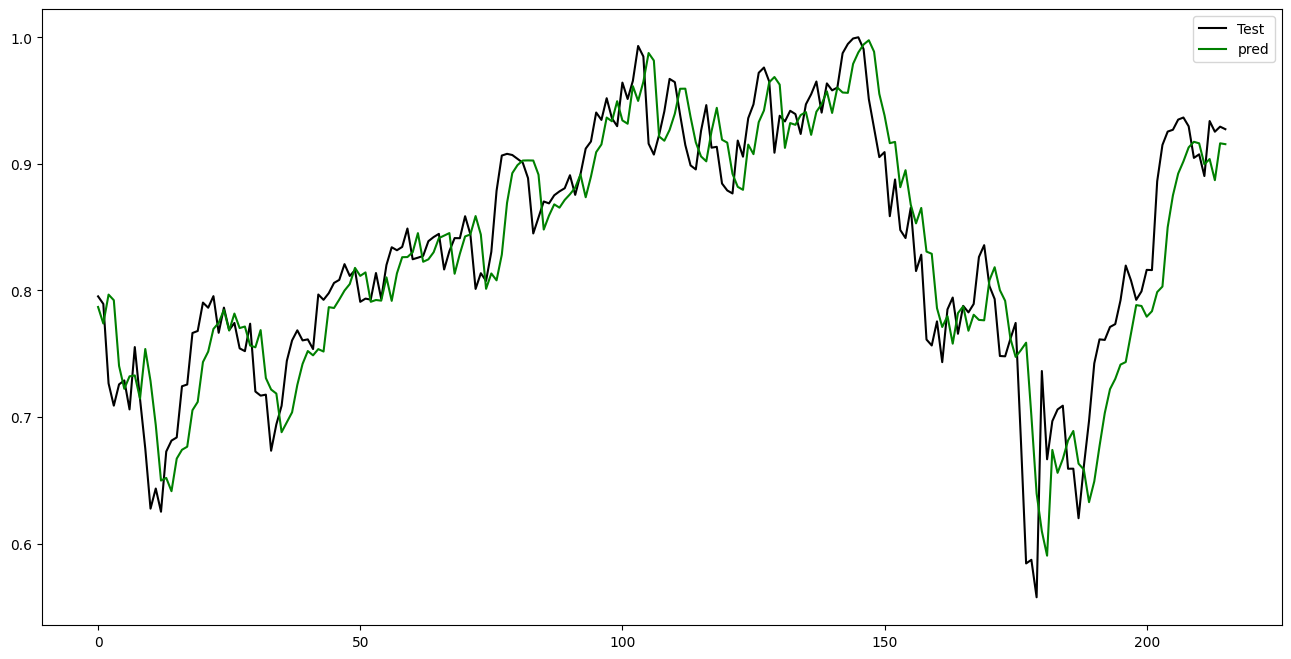

In [122]:
plt.figure(figsize=(16,8))
plt.plot(y_test, color = 'black', label = 'Test')
plt.plot(y_pred, color = 'green', label = 'pred')
plt.legend()
plt.show()

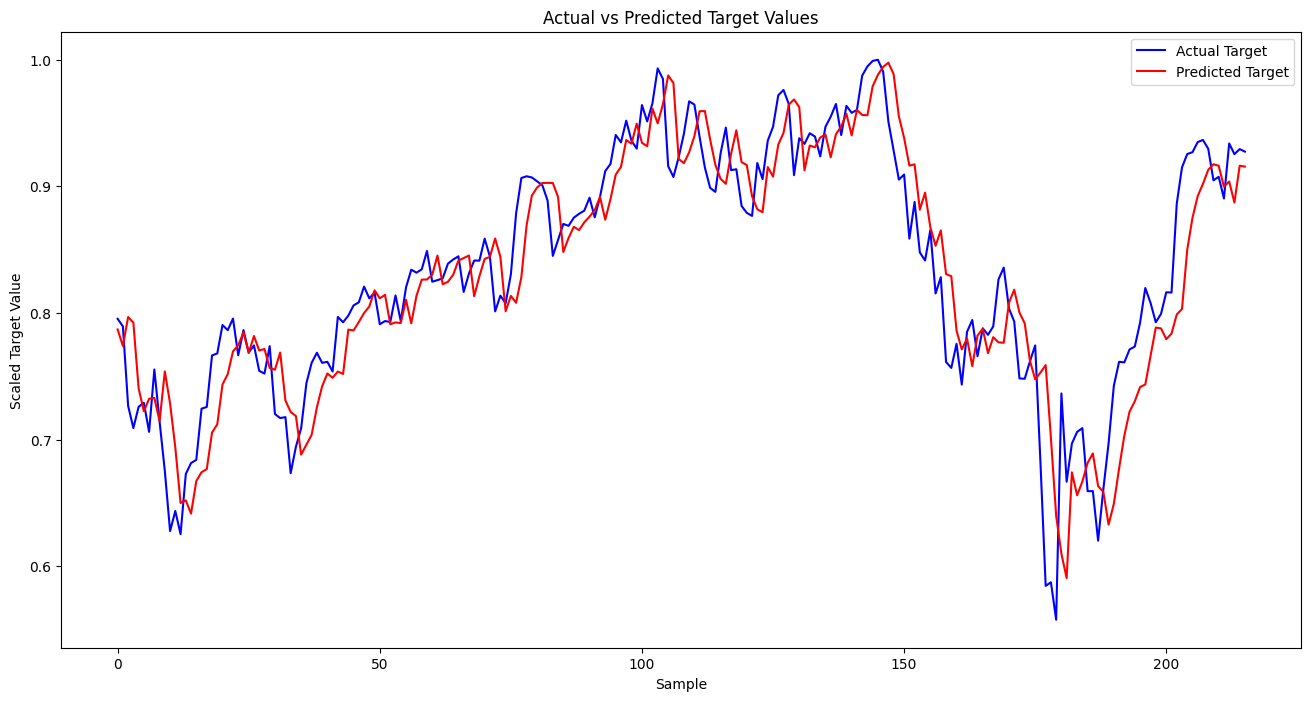

In [123]:
plt.figure(figsize=(16,8))
plt.plot(y_test, label='Actual Target', color='blue')
plt.plot(y_pred, label='Predicted Target', color='red')
plt.title('Actual vs Predicted Target Values')
plt.xlabel('Sample')
plt.ylabel('Scaled Target Value')
plt.legend()
plt.show()